In [2]:
import sys
import os 

os.environ["CONFIG_PATHS"] = "../../configs/small_model.yaml"
os.environ["CONFIG_OVERRIDES"] = 'game.moves_directory="../../data/moves_10"'
sys.path.append("../../src")

import matplotlib.pyplot as plt

from analysis import load_events, filter_events

In [3]:
events = load_events("../../data/2024-11-24_00-18-45-literatist/logs_2024-11-27_00-32-39_380859.txt")

Start time: 1732691558.820076


In [9]:
events[-1].timestamp - 4395.87

402.0531519699098

In [7]:
for e in events[::-1][:100000]:
    if e.name.startswith("training_"):
        print(e)

Event(timestamp=4395.872704029083, name='training_skip', params={})
Event(timestamp=4395.871673107147, name='training_batch', params={'value_loss': 0.8753791451454163, 'policy_loss': 0.3214808702468872, 'loss': 1.1968600749969482, 'batch_size': 64, 'cumulative_window_fed': 718947})
Event(timestamp=4395.466454982758, name='training_batch', params={'value_loss': 1.0163202285766602, 'policy_loss': 0.26613935828208923, 'loss': 1.2824596166610718, 'batch_size': 64, 'cumulative_window_fed': 718883})
Event(timestamp=4395.0884528160095, name='training_batch', params={'value_loss': 0.9770506620407104, 'policy_loss': 0.3032127618789673, 'loss': 1.2802634239196777, 'batch_size': 64, 'cumulative_window_fed': 718819})
Event(timestamp=4394.702104091644, name='training_batch', params={'value_loss': 0.9074362516403198, 'policy_loss': 0.3143579065799713, 'loss': 1.2217941284179688, 'batch_size': 64, 'cumulative_window_fed': 718755})
Event(timestamp=4394.303948163986, name='training_batch', params={'val

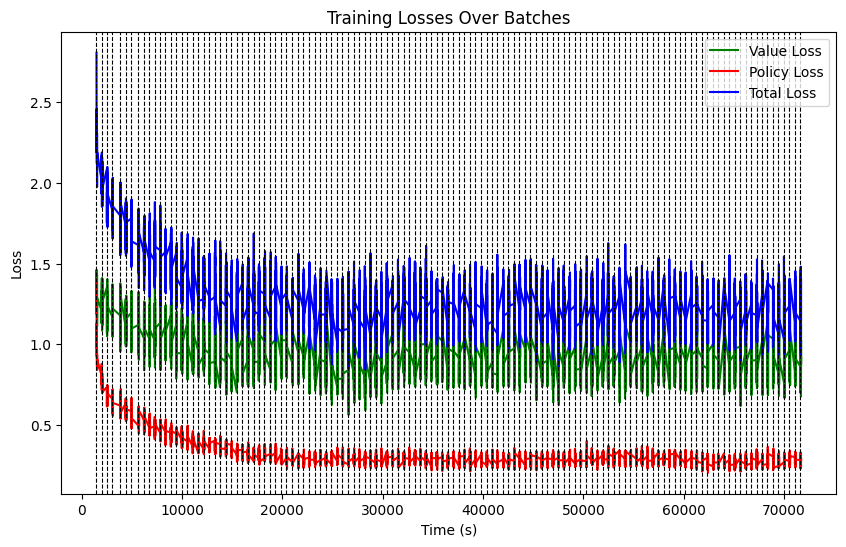

Total samples of training on:  1286144
Total samples available:  1350898
Sampling ratio:  0.9520659590879548
Number of training generations:  128


In [7]:
training_batches = filter_events(events, "training_batch")

model_names = [e.params["model_name"] for e in training_batches]
timestamps = [e.timestamp for e in training_batches]
value_losses = [e[2]["value_loss"] for e in training_batches]
policy_losses = [e[2]["policy_loss"] for e in training_batches]
total_losses = [e[2]["loss"] for e in training_batches]
batch_sizes = [e[2]["batch_size"] for e in training_batches]

training_start_times = [e[0] for e in events if e[1] == "training_start"]

plt.figure(figsize=(10, 6))

plt.plot(timestamps, value_losses, label='Value Loss', color='g')
plt.plot(timestamps, policy_losses, label='Policy Loss', color='r')
plt.plot(timestamps, total_losses, label='Total Loss', color='b')

for start_time in training_start_times:
    plt.axvline(x=start_time, color='k', linestyle='--', linewidth=0.8)

plt.xlabel('Time (s)')
plt.ylabel('Loss')
plt.title('Training Losses Over Batches')
plt.legend()
plt.show()

print("Total samples of training on: ", sum(batch_sizes))
print("Total samples available: ", int(max(model_names)))
print("Sampling ratio: ", sum(batch_sizes) / int(max(model_names)))
print("Number of training generations: ", len(training_start_times))


The plot below shows the number of samples in each training run. If this value is growing over time, and the time between each training run is also growing, that's an indication that training is not able to keep up with the rate of self-play.

In [9]:
model_names_sorted =sorted(model_names)

# Convert model names to integers and sort
model_ints = sorted([int(name) for name in model_names_sorted])
max_val = model_ints[-1]

# Find the closest existing model number to each target value
quarter_target = max_val // 4
half_target = max_val // 2  
three_quarter_target = (3 * max_val) // 4

# Find closest actual model numbers to these targets
quarter_model = min(model_ints, key=lambda x: abs(x - quarter_target))
half_model = min(model_ints, key=lambda x: abs(x - half_target))
three_quarter_model = min(model_ints, key=lambda x: abs(x - three_quarter_target))
final_model = max_val

milestone_models = [
    str(quarter_model).zfill(9),
    str(half_model).zfill(9), 
    str(three_quarter_model).zfill(9),
    str(final_model).zfill(9)
]

print("Milestone model names:")
print(f"~25% through training: {milestone_models[0]}")
print(f"~50% through training: {milestone_models[1]}")  
print(f"~75% through training: {milestone_models[2]}")
print(f"100% through training: {milestone_models[3]}")




Milestone model names:
~25% through training: 000340043
~50% through training: 000673469
~75% through training: 001016337
100% through training: 001350898
